In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,transactions,city,cluster,type,locale,locale_name,oil_price,holiday_flag
0,561,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770.0,Salinas,1,Holiday,National,Ecuador,NaN,1
1,562,562,2013-01-01,25,BABY CARE,0.0,0,770.0,Salinas,1,Holiday,National,Ecuador,NaN,1
2,563,563,2013-01-01,25,BEAUTY,2.0,0,770.0,Salinas,1,Holiday,National,Ecuador,NaN,1
3,564,564,2013-01-01,25,BEVERAGES,810.0,0,770.0,Salinas,1,Holiday,National,Ecuador,NaN,1
4,565,565,2013-01-01,25,BOOKS,0.0,0,770.0,Salinas,1,Holiday,National,Ecuador,NaN,1


In [4]:
data['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [5]:
data_auto = data[data['family'] == 'BEVERAGES']

In [6]:
data_auto.tail()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,transactions,city,cluster,type,locale,locale_name,oil_price,holiday_flag
55410,2992542,2992542,2017-08-11,25,BEVERAGES,6318.0,14,2195.0,Salinas,1,Transfer,National,Ecuador,48.81,1
55443,2994324,2994324,2017-08-12,25,BEVERAGES,4041.0,14,1946.0,Salinas,1,NaN,NaN,NaN,NaN,0
55476,2996106,2996106,2017-08-13,25,BEVERAGES,2238.0,12,1107.0,Salinas,1,NaN,NaN,NaN,NaN,0
55509,2997888,2997888,2017-08-14,25,BEVERAGES,2190.0,11,935.0,Salinas,1,NaN,NaN,NaN,47.59,0
55542,2999670,2999670,2017-08-15,25,BEVERAGES,1636.0,8,849.0,Salinas,1,Holiday,Local,Riobamba,47.57,0


In [7]:
data_auto = data_auto.drop(['id'], axis = 1)

In [8]:
data_auto['id'] = range(1, data_auto.shape[0] + 1)

In [9]:
#data_auto.index = data_auto.date

In [10]:
data_auto.head()

,Unnamed: 0,date,store_nbr,family,sales,onpromotion,transactions,city,cluster,type,locale,locale_name,oil_price,holiday_flag,id
3,564,2013-01-01,25,BEVERAGES,810.0,0,770.0,Salinas,1,Holiday,National,Ecuador,NaN,1,1
36,2346,2013-01-02,25,BEVERAGES,1373.0,0,1038.0,Salinas,1,NaN,NaN,NaN,93.14,0,2
69,4128,2013-01-03,25,BEVERAGES,992.0,0,887.0,Salinas,1,NaN,NaN,NaN,92.97,0,3
102,5910,2013-01-04,25,BEVERAGES,1317.0,0,1054.0,Salinas,1,NaN,NaN,NaN,93.12,0,4
135,7692,2013-01-05,25,BEVERAGES,1770.0,0,1355.0,Salinas,1,Work Day,National,Ecuador,NaN,1,5


In [11]:
df1 = data_auto.reset_index()['sales']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(25, 6))
#plt.plot(data_auto['sales'])

### Train-Test Split

In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.93)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [14]:
training_size, test_size

(1566, 118)

In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(1465, 100)
(1465,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(17, 100)
(17,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### RNN

In [20]:
### Create the Stacked RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN

In [21]:
model=Sequential(name = "SimpleRNN")
model.add(SimpleRNN(50,return_sequences=True,input_shape=(100,1)))
model.add(SimpleRNN(50,return_sequences=True))
model.add(SimpleRNN(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
23/23 [==============================] - 7s 121ms/step - loss: 0.0601 - val_loss: 0.0128
Epoch 2/20
23/23 [==============================] - 2s 85ms/step - loss: 0.0113 - val_loss: 0.0103
Epoch 3/20
23/23 [==============================] - 2s 85ms/step - loss: 0.0081 - val_loss: 0.0087
Epoch 4/20
23/23 [==============================] - 2s 85ms/step - loss: 0.0070 - val_loss: 0.0121
Epoch 5/20
23/23 [==============================] - 2s 85ms/step - loss: 0.0069 - val_loss: 0.0085
Epoch 6/20
23/23 [==============================] - 2s 86ms/step - loss: 0.0068 - val_loss: 0.0086
Epoch 7/20
23/23 [==============================] - 2s 84ms/step - loss: 0.0059 - val_loss: 0.0091
Epoch 8/20
23/23 [==============================] - 2s 84ms/step - loss: 0.0054 - val_loss: 0.0091
Epoch 9/20
23/23 [==============================] - 2s 86ms/step - loss: 0.0056 - val_loss: 0.0089
Epoch 10/20
23/23 [==============================] - 2s 86ms/step - loss: 0.0057 - val_loss: 0.0086
Epoch 11

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 69ms/step


In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2136.2591774038547

In [26]:
y_test = scaler.inverse_transform(ytest.reshape(-1, 1))

In [27]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

1003.6238198707498

In [28]:
import matplotlib.pyplot as plt

In [29]:
math.sqrt(sum((y_test - test_predict)**2)/len(y_test))

1003.6238198707498

In [30]:
abs(y_test - test_predict)

array([[ 424.046875  ],
       [ 267.80114746],
       [ 363.42468262],
       [  69.30871582],
       [ 162.26208496],
       [ 145.02404785],
       [ 130.71411133],
       [  40.96655273],
       [ 105.54003906],
       [ 167.00695801],
       [ 483.75695801],
       [ 353.19238281],
       [1242.65588379],
       [2860.3425293 ],
       [2252.79394531],
       [1183.46191406],
       [ 263.97338867]])

In [31]:
df_rnn = pd.DataFrame({'Original' : y_test.flatten(), 'Predicted' : test_predict.flatten()})

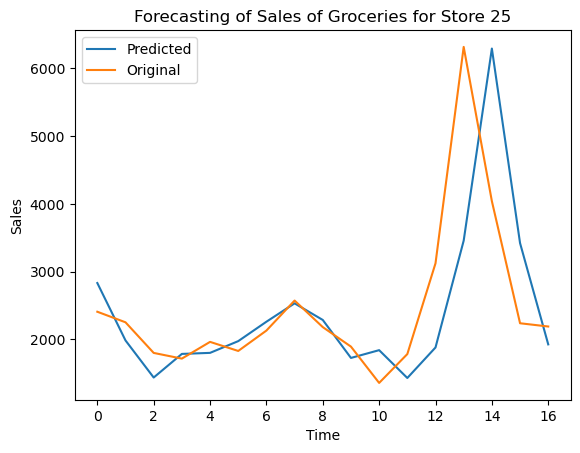

In [32]:
df_rnn['Predicted'].plot(legend = True)
df_rnn['Original'].plot(legend = True)
plt.title('Forecasting of Sales of Groceries for Store 25')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

## LSTM

In [33]:
#model_lstm=Sequential()
#model_lstm.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
#model_lstm.add(LSTM(50,return_sequences=True))
#model_lstm.add(LSTM(50))
#model_lstm.add(Dense(1))
#model_lstm.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
#model_lstm.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

In [35]:
### Lets Do the prediction and check performance metrics
#train_predict_lstm = model_lstm.predict(X_train)
#test_predict_lstm = model_lstm.predict(X_test)

In [36]:
##Transformback to original form
#train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
#test_predict_lstm =scaler.inverse_transform(test_predict_lstm)

In [37]:
#math.sqrt(mean_squared_error(y_train,train_predict_lstm))

In [38]:
### Test Data RMSE
#math.sqrt(mean_squared_error(ytest,test_predict_lstm))

In [39]:
### Plotting 
# shift train predictions for plotting
#look_back=100
#trainPredictPlot = np.empty_like(df1)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(train_predict_lstm)+look_back, :] = train_predict_lstm
# shift test predictions for plotting
#testPredictPlot = np.empty_like(df1)
#testPredictPlot[:, :] = np.nan
#testPredictPlot[len(train_predict_lstm)+(look_back*2)+1:len(df1)-1, :] = test_predict_lstm
# plot baseline and predictions
#plt.figure(figsize=(25, 6))
#plt.plot(scaler.inverse_transform(df1))
#plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
#plt.show()